In [1]:
import os

import dask.dataframe as dd
import networkit as nk
import networkx as nx
from matplotlib import pyplot as plt
from web3 import Web3

from graph_reinforcement_learning_using_blockchain_data import config

config.load_dotenv()


2025-02-12 14:06:08.638 | INFO     | graph_reinforcement_learning_using_blockchain_data.config:<module>:11 - PROJ_ROOT path is: /Users/liamtessendorf/Programming/Uni/2_Master/4_FS25_Programming/graph-reinforcement-learning-using-blockchain-data


True

In [2]:
ALCHEMY_API_URL = os.getenv("ALCHEMY_API_URL")
web3 = Web3(Web3.HTTPProvider(ALCHEMY_API_URL))

In [3]:
def parse_logs(s: str):
    safe_globals = {
        "__builtins__": {},
        "AttributeDict": lambda d: d,  # return the dict directly
        "HexBytes": lambda x: x,        # return the string argument
    }
    try:
        return eval(s, safe_globals)
    except Exception as e:
        print("Error parsing logs:", e)
        return []

In [4]:
dd_arbs = dd.read_csv(config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "arbitrages_with_logs.csv",
                      dtype={'end_amount': 'object',
                             'error': 'object',
                             'profit_amount': 'object',
                             'start_amount': 'object',
                             },
                      converters={'logs': parse_logs}
                      )

In [5]:
dd_arbs["logs"] = dd_arbs["logs"].apply(parse_logs, meta=("logs", "object"))

In [6]:
dd_normal = dd.read_csv(config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "class0_with_logs.csv")
dd_normal["receipt"] = dd_normal["receipt"].apply(parse_logs, meta=("logs", "object"))
dd_normal["logs"] = dd_normal["receipt"].apply(lambda x: x["logs"], meta=("logs", "object"))

In [7]:
dd_arbs.head()

,id,created_at,account_address,profit_token_address,block_number,transaction_hash,start_amount,end_amount,profit_amount,error,protocols,logs
0,7108fc71-883d-45b2-a6d4-0da61eb0a777,2023-05-18 15:32:43.208654,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950601,0x7836e253e6b932564e23e3162badd365ff8fbfa93f9f...,54865003552880478,62515568704076031,7650565151195553,<NA>,"[""uniswap_v2""]",[{'blockHash': '0x196c250ac3f953b996f9024ec93c...
1,23cd0052-4fb9-4ded-a6ff-5c2c7998f24d,2023-05-18 15:32:45.587223,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950602,0x299048408548ccd465e99a83d7342467a65a780064f4...,89185111706660168,92271485564350625,3086373857690457,<NA>,"[""uniswap_v2"",""uniswap_v3""]",[{'blockHash': '0xb7b27a4871eba9cd96bf6b2704b2...
2,a37c326f-9630-4034-ba32-4dd24544a5f2,2023-05-18 15:32:53.751029,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950607,0xb5ad6f9c677f1b7b618e9b138f601940f74a111b4004...,91060864908553544,96762829684099802,5701964775546258,<NA>,"[""uniswap_v2"",""uniswap_v3""]",[{'blockHash': '0x4d3c834264d0bd534ed21e72179f...
3,0fb64b84-3bf8-4ca2-a5da-58c89fda51e1,2023-05-18 15:32:53.751029,0x7efd91c8ca31e7452c5c4de00a8ca1c18910a35f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950607,0xbd92de852e56dcb439aa576a0161fe5b8e0ab0735ef4...,554451451942816833,561352734048392148,6901282105575315,<NA>,"[""uniswap_v2"",""uniswap_v3""]",[{'blockHash': '0x4d3c834264d0bd534ed21e72179f...
4,26170f74-d174-4fec-a07f-7f95b9eb90cb,2023-05-18 15:33:07.228647,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xdac17f958d2ee523a2206206994597c13d831ec7,16950616,0x84def9f72e2962af2c27ed8a95a84971c00212dc23b7...,920317261,929402944,9085683,<NA>,"[""uniswap_v3""]",[{'blockHash': '0xb9a0877950fc5fad63d8f15463d0...


In [8]:
dd_normal.head()

,block_number,transaction_hash,receipt,logs
0,16950601,4d419ef95a879f7d3da5ad7b55289ba88e360d5df7d42b...,{'transactionHash': '0x8e90ecb85b61af368db0154...,[{'blockHash': '0xb6e2ade980aad8c2054ca26beb98...
1,16950601,5f7a16727b0ed026b1656924be454df15951fc3d135093...,{'transactionHash': '0xd83c25449d0766a18945f10...,[{'blockHash': '0xb4bb6a42db43c3a23bef597fceb9...
2,16950601,07d24a0c6b2837c5731ad659f62c59b935b2195e70dcd0...,{'transactionHash': '0x8b434ba680a93cc0e85a7c4...,[]
3,16950601,93211130eb153a9aafe8f6369f747e894750723a51c237...,{'transactionHash': '0x8d3b8e46a66a909643f2bb7...,[{'blockHash': '0x6939a55940dc342800e0f589d9f3...
4,16950601,7e3b9d96c2c7b2e3fd4cf4fb8b8a97f004861d6087fc8d...,{'transactionHash': '0x25908bad48b2353a1da142d...,[{'blockHash': '0x0e8b14acb8a7585b620b340c740e...


In [9]:
ddf = dd.concat([dd_arbs, dd_normal])

In [18]:
ddf.head()

,id,created_at,account_address,profit_token_address,block_number,transaction_hash,start_amount,end_amount,profit_amount,error,protocols,logs,receipt
0,7108fc71-883d-45b2-a6d4-0da61eb0a777,2023-05-18 15:32:43.208654,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950601,0x7836e253e6b932564e23e3162badd365ff8fbfa93f9f...,54865003552880478,62515568704076031,7650565151195553,<NA>,"[""uniswap_v2""]",[{'blockHash': '0x196c250ac3f953b996f9024ec93c...,NaN
1,23cd0052-4fb9-4ded-a6ff-5c2c7998f24d,2023-05-18 15:32:45.587223,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950602,0x299048408548ccd465e99a83d7342467a65a780064f4...,89185111706660168,92271485564350625,3086373857690457,<NA>,"[""uniswap_v2"",""uniswap_v3""]",[{'blockHash': '0xb7b27a4871eba9cd96bf6b2704b2...,NaN
2,a37c326f-9630-4034-ba32-4dd24544a5f2,2023-05-18 15:32:53.751029,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950607,0xb5ad6f9c677f1b7b618e9b138f601940f74a111b4004...,91060864908553544,96762829684099802,5701964775546258,<NA>,"[""uniswap_v2"",""uniswap_v3""]",[{'blockHash': '0x4d3c834264d0bd534ed21e72179f...,NaN
3,0fb64b84-3bf8-4ca2-a5da-58c89fda51e1,2023-05-18 15:32:53.751029,0x7efd91c8ca31e7452c5c4de00a8ca1c18910a35f,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,16950607,0xbd92de852e56dcb439aa576a0161fe5b8e0ab0735ef4...,554451451942816833,561352734048392148,6901282105575315,<NA>,"[""uniswap_v2"",""uniswap_v3""]",[{'blockHash': '0x4d3c834264d0bd534ed21e72179f...,NaN
4,26170f74-d174-4fec-a07f-7f95b9eb90cb,2023-05-18 15:33:07.228647,0x4870525eae23fceb31df613d179ef6275e1b93a9,0xdac17f958d2ee523a2206206994597c13d831ec7,16950616,0x84def9f72e2962af2c27ed8a95a84971c00212dc23b7...,920317261,929402944,9085683,<NA>,"[""uniswap_v3""]",[{'blockHash': '0xb9a0877950fc5fad63d8f15463d0...,NaN


In [33]:
def extract_transfer_addresses(log):
    topics = log["topics"]
    ERC20_TRANSFER_SIG = "0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef"
    if topics[0] != ERC20_TRANSFER_SIG:
        return None, None
    if len(topics) < 3:
        return None, None
    from_address = "0x" + topics[1][-40:]
    to_address = "0x" + topics[2][-40:]
    return from_address, to_address

def build_graph_for_block(df_block):
    G = nx.MultiDiGraph()
    address_to_node = {}

    for _, row in df_block.iterrows():
        logs = row["logs"]
        if not logs:
            continue
        for log in logs:
            from_addr, to_addr = extract_transfer_addresses(log)
            if from_addr is None or to_addr is None:
                continue
            
            if log["data"] == "0x":
                value = 0
            else:
                value = int(log["data"], 16)
                
            G.add_node(from_addr)
            G.add_node(to_addr)
            G.add_edge(from_addr, to_addr, value=value, log_index=log["logIndex"], tx_hash=log["transactionHash"], topics=log["topics"],
                       transaction_index=log["transactionIndex"])

    return G, address_to_node


def build_graphs_per_block(df):
    """
    Given a Pandas DataFrame with a column "block_number", "transaction_hash", and "logs",
    build a dictionary mapping each block number to its corresponding Networkit graph.
    """
    graphs = {}
    for block, group in df.groupby("block_number"):
        G, mapping = build_graph_for_block(group)
        graphs[block] = (G, mapping)
    return graphs

In [11]:
df = ddf.compute()
df = df[df["block_number"] == 16950601]

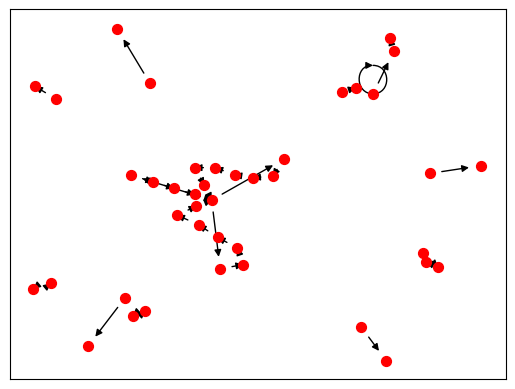

In [36]:
graphs = build_graphs_per_block(df)

block = 16950601
if block in graphs:
    G, mapping = graphs[block]
    plt.figure()
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_color="red", node_size=50)
    # nx.draw_networkx_labels(G, pos, font_size=6, font_color="black")

    edge_labels = {}
    for u, v, key, data in G.edges(keys=True, data=True):
        if G.has_edge(v, u):
            rad = 0.2 if key % 2 == 0 else -0.2
        else:
            rad = 0.0
        nx.draw_networkx_edges(
            G, pos,
            edgelist=[(u, v)],
            arrowstyle="-|>",
            arrowsize=10,
            connectionstyle=f"arc3, rad={rad}",
        )
    # plt.margins(0.4)

    plt.show()

In [35]:
nx.write_gml(G, "my_graph.gml")